# Estimate the Life Satisfaction based on GDP

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('country_gdp_life_satisfaction_data.csv')

In [29]:
data

,Country,GDP,Life_Satisfaction
0,Russia,9054.91,6.0
1,Turkey,9437.37,5.6
2,Hungary,12239.89,4.9
3,Poland,12495.33,5.8
4,Slovak Republic,15991.74,6.1
5,Estonia,17288.08,5.6
6,Greece,18064.29,4.8
7,Portugal,19121.59,5.1
8,Slovenia,20732.48,5.7
9,Spain,25864.72,6.5


# Visualizing the dataset using the scatter plot

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set()

In [7]:
font = {
    'size': 20
}

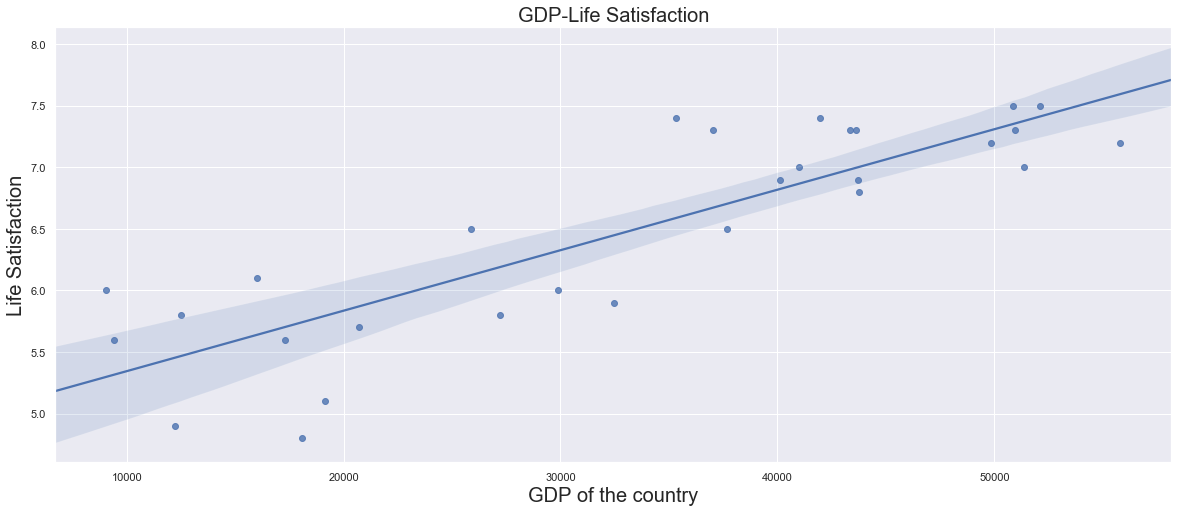

In [8]:
plt.figure(figsize=(20, 8))
sns.regplot(x='GDP', y='Life_Satisfaction', data=data)
plt.xlabel('GDP of the country', fontdict=font)
plt.ylabel('Life Satisfaction', fontdict=font)
plt.title('GDP-Life Satisfaction', fontdict=font)
plt.savefig('GDP-Country.png')
plt.show()

## Performing Machine Learning - Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
training_data = data['GDP']

In [12]:
output_data = data['Life_Satisfaction']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.2, random_state=42)

In [15]:
model.fit(X, Y)

ValueError: Expected 2D array, got 1D array instead:
array=[43724.03  9054.91 51350.74 35343.34 37675.01 29866.58 40996.51  9437.37
 15991.74 17288.08 12239.89 50854.58 12495.33 49866.27 50961.87 41973.99
 55805.2  43603.12 19121.59 27195.2  37044.89 43331.96 18064.29].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
import numpy as np

In [17]:
training_data = np.c_[training_data]

In [18]:
output_data = np.c_[output_data]

In [19]:
X, x_test, Y, y_test = train_test_split(training_data, output_data, test_size=0.2, random_state=42)

In [20]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
predictions = model.predict(x_test)

In [22]:
predictions

array([[7.43060375],
       [6.84001649],
       [6.46517594],
       [7.02023218],
       [5.88710471],
       [6.1395324 ]])

In [28]:
y_test

array([[7.5],
       [6.9],
       [5.9],
       [6.8],
       [5.7],
       [6.5]])

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(predictions, y_test)

In [32]:
mse

0.09021416417322092

## Saving the model to external file

In [33]:
from sklearn.externals import joblib

In [34]:
file = "gdp_model.sav"

In [35]:
joblib.dump(filename=file, value=model)

['gdp_model.sav']